In [122]:
# Data frame and Librairies Import
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

<ipython-input-122-fd4aa077e54e>:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [123]:
# Cleaning data
# Remoove nan values and duplicates
df = df.dropna(subset=['Athlete year of birth'])
df.drop_duplicates(inplace=True)


In [124]:
df.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [125]:
# Small inspection of columns types to make myself an idea
df.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete club,object
Athlete country,object
Athlete year of birth,float64
Athlete gender,object


In [126]:
# Continue data Cleaning

# Create new column that will contain events countries by Extracting the countries mentionned in brackets from 'Event country'column

df['Event name'] = df['Event name'].astype(str) # convertion to str
df['Event country'] = df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

# Cleaning the  'Event name' column to remoove the country inside brackets
df['Event name'] = df['Event name'].str.split('(').str.get(0)

df.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event country
0,2018,06.01.2018,Selva Costera,50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0,CHI
1,2018,06.01.2018,Selva Costera,50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1,CHI
2,2018,06.01.2018,Selva Costera,50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2,CHI
3,2018,06.01.2018,Selva Costera,50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3,CHI
4,2018,06.01.2018,Selva Costera,50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4,CHI


In [127]:
# creating testing data frame for comparison
df_fr = df[df['Event country'] == 'FRA']  # event occuring only in France
df_us = df[df['Event country'] == 'USA']  # event occuring only in Usa

In [128]:
# This section, we compare  Event distance/length	 that has most count in each df so we can run analytics on

# These codes tells us  which event distances are most common in USA
df_us.groupby(['Event distance/length']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Event distance/length,Count
277,50km,625737
279,50mi,284823
9,100mi,123307
7,100km,56414
118,24h,47580
...,...,...
288,510mi,1
341,61.15km,1
149,300km,1
394,89.4mi,1


In [129]:
# This code tells us  which event distances are most common in France
df_fr.groupby(['Event distance/length']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Event distance/length,Count
4,100km,111514
305,50km,60512
264,45km,41402
481,80km,38947
345,55km,36887
...,...,...
151,180km/3Etappen,2
503,86km/3Etappen,1
304,504km,1
463,76.4km/3Etappen,1


In [130]:
# We now create a new DataFrame 'df_USA'  containing only 50km events that took place in the USA in 2018
df_USA = df[(df['Event distance/length'] == '50km') & (df['Event country'] == 'USA') & (df['Year of event'] == 2018)  ]
df_USA

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event country
64,2018,06.01.2018,Yankee Springs 50 km Winter Challenge,50km,36,5:09:40 h,"*Okemos, MI",USA,1991.0,F,W23,9.688,64,USA
65,2018,06.01.2018,Yankee Springs 50 km Winter Challenge,50km,36,6:00:47 h,"*Comstock Park, MI",USA,1976.0,M,M40,8.315,65,USA
66,2018,06.01.2018,Yankee Springs 50 km Winter Challenge,50km,36,6:02:02 h,"*Goshen, IN",USA,1992.0,F,W23,8.287,66,USA
67,2018,06.01.2018,Yankee Springs 50 km Winter Challenge,50km,36,6:02:44 h,"*Longmont, CO",USA,1987.0,M,M23,8.271,67,USA
68,2018,06.01.2018,Yankee Springs 50 km Winter Challenge,50km,36,6:10:30 h,"*Goshen, IN",USA,1964.0,M,M50,8.097,68,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660712,2018,27.10.2018,Mission Tejas Trail Run,50km,72,9:24:46 h,"*Tyler, TX",USA,1968.0,F,W45,5.312,341057,USA
660713,2018,27.10.2018,Mission Tejas Trail Run,50km,72,9:25:57 h,"*Conroe, TX",USA,1996.0,M,MU23,5.301,218567,USA
660714,2018,27.10.2018,Mission Tejas Trail Run,50km,72,10:09:45 h,"*Forr Worth, TX",USA,1976.0,F,W40,4.92,374638,USA
660715,2018,27.10.2018,Mission Tejas Trail Run,50km,72,10:21:35 h,"*Euless, TX",USA,1986.0,F,W23,4.826,374639,USA


In [131]:
# Final data cleaning before answering some EDA  questions
# Addding ' Athelete age' column based on the event year
df_USA['Athlete age'] = 2018 - df_USA['Athlete year of birth']

# Convert 'Athlete age' to integers and handling NaN values
df_USA['Athlete age'] = df_USA['Athlete age'].fillna(0).astype(int) # Fill NaN with 0 before converting to int
df_USA['Athlete age'] = df_USA['Athlete age'].astype(int)

# Reorganisation of the data frame
df_USA = df_USA.drop(columns=['Athlete year of birth','Event dates','Athlete age category','Athlete ID'])
df_USA = df_USA[['Event name','Event distance/length','Event country','Year of event','Event number of finishers',	'Athlete performance',
                'Athlete average speed','Athlete age',	'Athlete gender', 'Athlete club',	'Athlete country']]
df_USA.reset_index(drop=True, inplace=True)
df_USA.head()

<ipython-input-131-7b4e74449043>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['Athlete age'] = 2018 - df_USA['Athlete year of birth']
<ipython-input-131-7b4e74449043>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA['Athlete age'] = df_USA['Athlete age'].fillna(0).astype(int) # Fill NaN with 0 before converting to int
<ipython-input-131-7b4e74449043>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Event name,Event distance/length,Event country,Year of event,Event number of finishers,Athlete performance,Athlete average speed,Athlete age,Athlete gender,Athlete club,Athlete country
0,Yankee Springs 50 km Winter Challenge,50km,USA,2018,36,5:09:40 h,9.688,27,F,"*Okemos, MI",USA
1,Yankee Springs 50 km Winter Challenge,50km,USA,2018,36,6:00:47 h,8.315,42,M,"*Comstock Park, MI",USA
2,Yankee Springs 50 km Winter Challenge,50km,USA,2018,36,6:02:02 h,8.287,26,F,"*Goshen, IN",USA
3,Yankee Springs 50 km Winter Challenge,50km,USA,2018,36,6:02:44 h,8.271,31,M,"*Longmont, CO",USA
4,Yankee Springs 50 km Winter Challenge,50km,USA,2018,36,6:10:30 h,8.097,54,M,"*Goshen, IN",USA


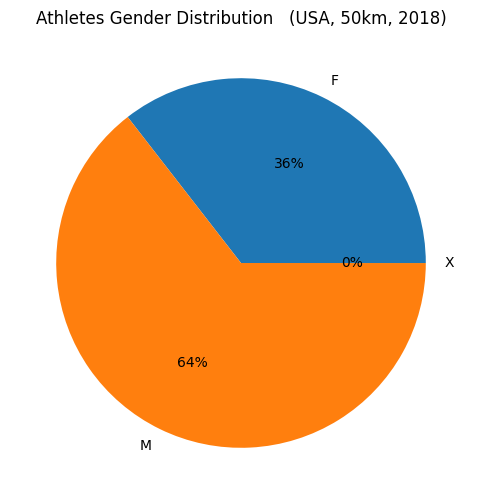

In [132]:
# Graphs and EDA  questions to answer from data sets

#1 - What is the gender distribution of athletes who ran the 50km race in the USA in 2018?

# This code creates a pie chart to show the gender distribution of athletes in the filtered dataset df_USA.
gender_counts = df_USA.groupby('Athlete gender').size() # gender counts
gender_counts.plot(kind='pie', y='Athlete gender', autopct='%1.0f%%', figsize=(6, 6))
plt.title('Athletes Gender Distribution   (USA, 50km, 2018)')
plt.show()

In [133]:
# 2 - Are there any clubs that have only female or only male athletes?
# Distribution of athelete gender in clubs
df_USA.groupby('Athlete club')[('Athlete gender')].unique()

,Athlete gender
Athlete club,
* NJ,[F]
"*17062, PA",[F]
"*35763, AL",[M]
"*45140, OH",[F]
"*68105, NE",[F]
...,...
TA Fitness,"[M, F]"
Team Eagle ONE,[M]
Twisted Trail Runners,"[M, F]"


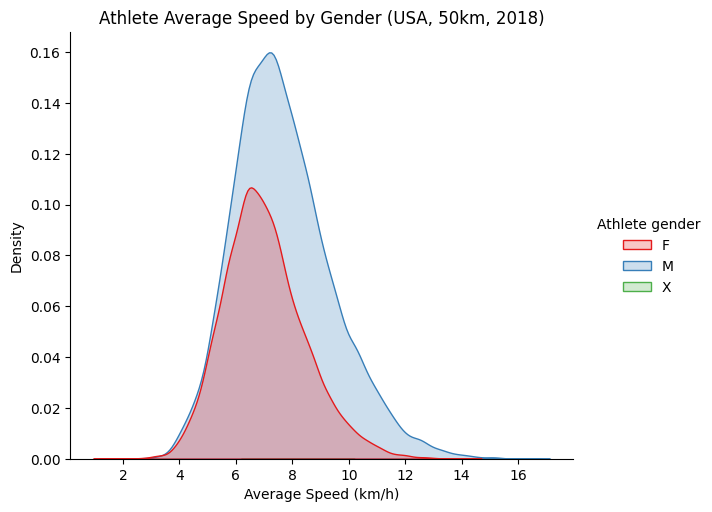

In [116]:
# 3 - What is the distribution of athlete average speed gender based who ran the 50km race in the USA in 2018? ?
# We need to transfrom ' Athlete average speed' first to numerical values before running displot
df_USA['Athlete average speed'] = pd.to_numeric(df_USA['Athlete average speed'], errors='coerce')

#  Distribution plot (histogram) of athlete average speeds. Male vs Women
sns.displot(
    data=df_USA,
    x='Athlete average speed',
    hue='Athlete gender', # splits the data into two curves (e.g., M vs F).
    kind='kde',
    fill=True,          # fills the area under the curve
    palette='Set1',     # color palette (red/blue by default)
    height=5,
    aspect=1.2
)

plt.title('Athlete Average Speed by Gender (USA, 50km, 2018)')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Density')
plt.show()

In [134]:
# 4 - What’s the average performance time per club? Which clubs has the best average times?

# Before comparing best performance time, lets clean up the 'athlete performance' column
# Change 'Athlete performance' column format by remooving 'h' and then applied h:m:s format
df_USA['Athlete performance'] = df_USA['Athlete performance'].str.replace(' h', '', regex=False)
df_USA['Athlete performance'] = pd.to_timedelta(df_USA['Athlete performance'])
df_USA.groupby('Athlete club')[('Athlete performance')].mean().sort_values(ascending=True)

,Athlete performance
Athlete club,
*Nairobi,0 days 03:02:13
"*Chappaqua, NY",0 days 03:17:01
"*Amityville, NY",0 days 03:24:30
"*Fort Howard, MD",0 days 03:31:32
"*Grayslake, NY",0 days 03:31:57
...,...
"*Rusk, TX",0 days 15:12:36
"*Princeville, IL",0 days 16:07:56
"*Jamestown, PA",0 days 16:21:10


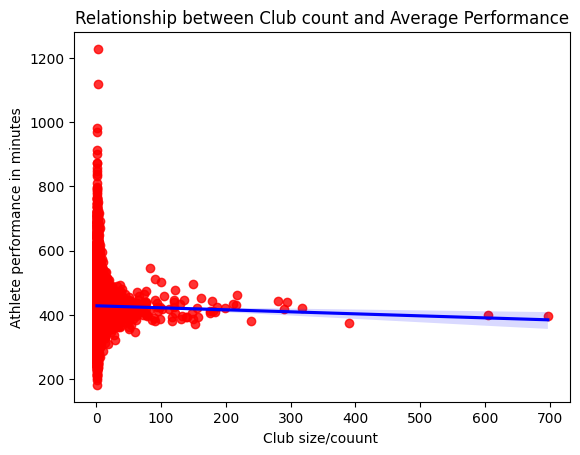

In [135]:
# 5- Do clubs with more athletes perform better or worse on average?
# ( in other word, is there a correlation between club size and their average performance ? )

# Group by our data by club size and the athlete performance
club_stats = df_USA.groupby('Athlete club')['Athlete performance'].agg(['mean','count']).sort_index(ascending=False).sort_values(by='mean',ascending=True)

# Convert 'mean' column to seconds (numerical value ) for plotting
club_stats['mean'] = club_stats['mean'].dt.total_seconds()/60  # Access the total seconds

# plotting a linear regression line to answer the question
sns.regplot(x='count', y='mean', data=club_stats, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Relationship between Club count and Average Performance')
plt.xlabel('Club size/couunt ')
plt.ylabel('Athlete performance in minutes')
plt.show()

In [138]:
# 6 - What age groups are the best in the 50 km race performance based ?
df_USA.groupby('Athlete age')['Athlete performance'].agg(['mean']).sort_values(by='mean', ascending=True)

,mean
Athlete age,
20,0 days 06:32:36.735483870
23,0 days 06:35:47.865435356
27,0 days 06:36:07.463800904
24,0 days 06:36:36.554435483
22,0 days 06:37:09.721830985
...,...
83,0 days 09:09:00
77,0 days 09:38:10.166666666
79,0 days 10:05:22.454545454


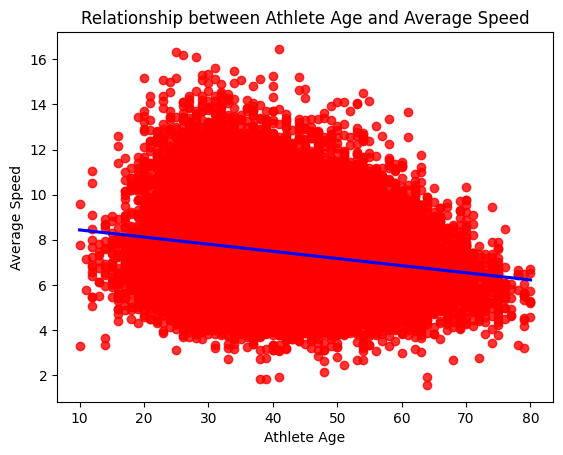

In [139]:
# 7 - Is there a relationship between athlete age and their average speed?

# To make  sure we have great insign , we only focus on age between 10 and 80 Years Old in our data frame
df_USA_cleaned = df_USA[(df_USA['Athlete age'] >= 10) & (df_USA['Athlete age'] <= 80)]

# Ensure both columns are numeric
df_USA['Athlete age'] = pd.to_numeric(df_USA['Athlete age'], errors='coerce')
df_USA['Athlete average speed'] = pd.to_numeric(df_USA['Athlete average speed'], errors='coerce')

# scatter plot to view the correlation
sns.regplot(x='Athlete age', y='Athlete average speed', data=df_USA_cleaned, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Relationship between Athlete Age and Average Speed')
plt.xlabel('Athlete Age')
plt.ylabel('Average Speed')
plt.show()
